In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [2]:
np.random.seed(7)

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")

X_train = X_train / 255
X_test = X_test / 255

In [3]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
Total para

In [4]:
decoder_input = Input(shape=(4,4,8))
decoder_layer = autoencoder.layers[-7](decoder_input)
decoder_layer = autoencoder.layers[-6](decoder_layer)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 16)        0         
__________

In [5]:
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])

autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), 
                epochs=10, batch_size=128, shuffle=True, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 15s - loss: 26.3973 - acc: 0.7962 - val_loss: 19.1366 - val_acc: 0.8019
Epoch 2/10
 - 8s - loss: 17.4615 - acc: 0.8047 - val_loss: 16.0983 - val_acc: 0.8053
Epoch 3/10
 - 8s - loss: 15.6197 - acc: 0.8080 - val_loss: 14.9453 - val_acc: 0.8080
Epoch 4/10
 - 8s - loss: 14.7616 - acc: 0.8094 - val_loss: 14.3009 - val_acc: 0.8090
Epoch 5/10
 - 8s - loss: 14.2397 - acc: 0.8101 - val_loss: 13.9258 - val_acc: 0.8087
Epoch 6/10
 - 8s - loss: 13.8846 - acc: 0.8106 - val_loss: 13.5986 - val_acc: 0.8097
Epoch 7/10
 - 8s - loss: 13.6187 - acc: 0.8109 - val_loss: 13.3757 - val_acc: 0.8097
Epoch 8/10
 - 8s - loss: 13.4075 - acc: 0.8113 - val_loss: 13.2006 - val_acc: 0.8103
Epoch 9/10
 - 8s - loss: 13.2266 - acc: 0.8115 - val_loss: 13.0171 - val_acc: 0.8103
Epoch 10/10
 - 8s - loss: 13.0790 - acc: 0.8117 - val_loss: 12.9442 - val_acc: 0.8113


In [6]:
# 壓縮圖片
encoded_imgs = encoder.predict(X_test)
# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)

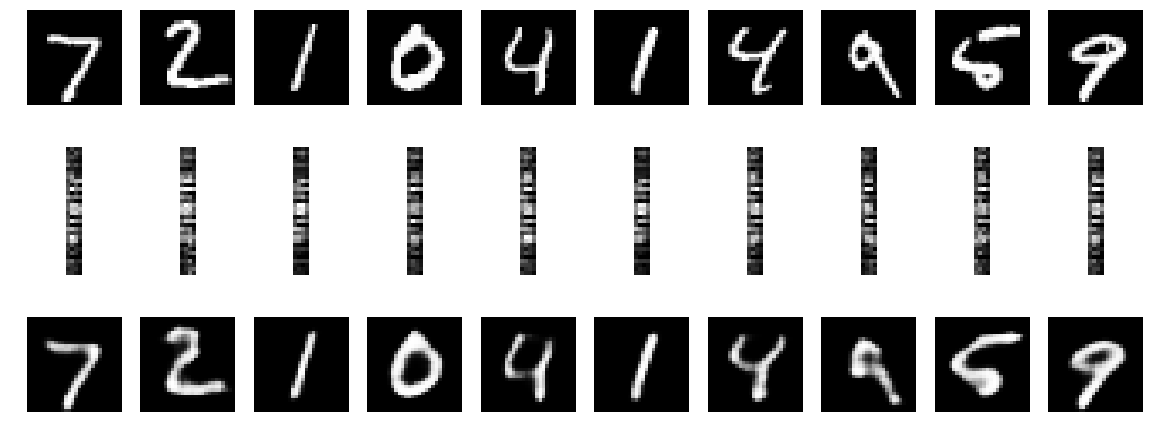

In [8]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(4, 4*8).T, cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

In [ ]:
nf = 0.5
size_train = X_train.shape
X_train_noisy = X_train+nf*np.random.normal(loc=0.0,
                          scale=1.0,size=size_train)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
size_test = X_test.shape
X_test_noisy = X_test+nf*np.random.normal(loc=0.0,
                          scale=1.0,size=size_test)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [ ]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoder.summary()

In [ ]:
decoder_input = Input(shape=(4,4,8))
decoder_layer = autoencoder.layers[-7](decoder_input)
decoder_layer = autoencoder.layers[-6](decoder_layer)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()

In [ ]:
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])

autoencoder.fit(X_train_noisy, X_train, 
                validation_data=(X_test_noisy, X_test), 
                epochs=10, batch_size=128, shuffle=True, verbose=2)

In [ ]:
encoded_imgs = encoder.predict(X_test_noisy)

decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 8))
for i in range(n):
    # 雜訊圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(4, 4*8).T, cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()